In [136]:
import pandas as pd
import string # for removing punctuaation
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [30]:
data = pd.read_csv("combined_data.csv", index_col = 0, header = 0)

data.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [31]:
data.shape

(53043, 2)

In [32]:
data.isnull().sum()

statement    362
status         0
dtype: int64

In [33]:
data = data.dropna(axis = 0, how = "any")

In [34]:
data.isnull().sum()

statement    0
status       0
dtype: int64

In [35]:
data.columns

Index(['statement', 'status'], dtype='object')

In [36]:
data.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [41]:
data["statement"] = data["statement"].str.lower()
data["status"] = data["status"].str.lower()
data.head()

,statement,status
0,oh my gosh,anxiety
1,"trouble sleeping, confused mind, restless hear...",anxiety
2,"all wrong, back off dear, forward doubt. stay ...",anxiety
3,i've shifted my focus to something else but i'...,anxiety
4,"i'm restless and restless, it's been a month n...",anxiety


Check for duplicates

In [46]:
duplicates = data[data.duplicated(subset = ("statement", "status"), keep = False)]
duplicates

,statement,status
18,"""no regrets or grudges/angry at things that ha...",anxiety
39,but my heart is still restless even though my ...,anxiety
56,why am i nervous,anxiety
88,anxious,anxiety
97,"""no regrets or grudges/angry at things that ha...",anxiety
...,...,...
53038,nobody takes me seriously i’ve (24m) dealt wit...,anxiety
53039,"selfishness ""i don't feel very good, it's lik...",anxiety
53040,is there any way to sleep better? i can't slee...,anxiety
53041,"public speaking tips? hi, all. i have to give ...",anxiety


In [47]:
print("Examples of duplicated rows (same statement and label):")
print(duplicates.head(10))

Examples of duplicated rows (same statement and label):
                                             statement   status
18   "no regrets or grudges/angry at things that ha...  anxiety
39   but my heart is still restless even though my ...  anxiety
56                                    why am i nervous  anxiety
88                                             anxious  anxiety
97   "no regrets or grudges/angry at things that ha...  anxiety
132  i want to exhale the restlessness in my chest ...  anxiety
138  but my heart is still restless even though my ...  anxiety
155                              restless and agitated  anxiety
167  i want to exhale the restlessness in my chest ...  anxiety
168                  restless restlessness accompanies  anxiety


In [51]:
data = data.drop_duplicates(subset=["statement", "status"], keep="first")
data.shape

(51071, 2)

In [55]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.strip()  # Remove leading and trailing spaces
    text = re.sub(r'\s+', ' ', text) # Replace multiple spaces with a single space
    text = re.sub(r'http[s]?://\S+', '', text) # remove HTML links
    
    # remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    
    return text

In [59]:
data['statement'] = data['statement'].apply(clean_text)
data = data[data['statement'].str.strip() != ""]

In [64]:
data.head()

statement    trouble sleeping confused mind restless heart ...
status                                                 anxiety
Name: 1, dtype: object


Exploratory Data Analysis

In [82]:
counts = data["status"].value_counts()
print(counts)

status = list(data["status"].unique())

status
normal                  16018
depression              15094
suicidal                10644
anxiety                  3620
bipolar                  2501
stress                   2296
personality disorder      895
Name: count, dtype: int64


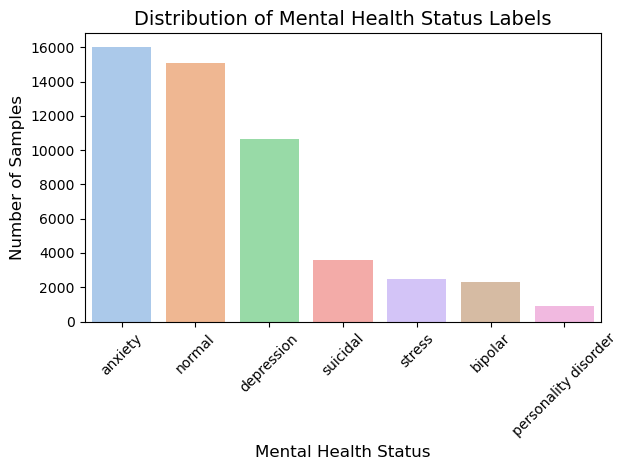

In [105]:
sns.barplot(x = status, y = counts, hue = status, legend = False, palette = 'pastel')

plt.title("Distribution of Mental Health Status Labels", fontsize=14)
plt.xlabel("Mental Health Status", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='status', ylabel='text_length'>

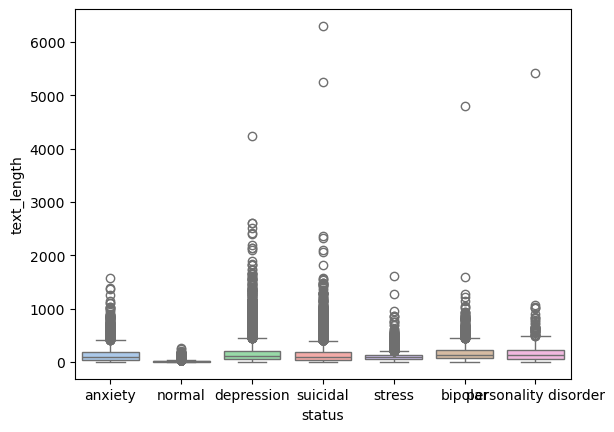

In [108]:
data['text_length'] = data['statement'].apply(lambda x: len(x.split()))
sns.boxplot(data = data, x='status', y='text_length', hue = 'status', legend = False, palette = "pastel")

In [115]:
vectorizer = CountVectorizer(stop_words = "english")

# word count matrix
X = vectorizer.fit_transform(data["statement"])
#vectorizer.vocabulary_

{'oh': 49106,
 'gosh': 29735,
 'trouble': 70915,
 'sleeping': 62736,
 'confused': 15504,
 'mind': 44544,
 'restless': 57940,
 'heart': 31772,
 'tune': 71177,
 'wrong': 76582,
 'dear': 18074,
 'forward': 27475,
 'doubt': 21232,
 'stay': 64893,
 'place': 52809,
 'ive': 37402,
 'shifted': 61582,
 'focus': 27084,
 'im': 35040,
 'worried': 76286,
 'month': 45421,
 'boy': 10939,
 'mean': 43326,
 'break': 11127,
 'nervous': 47216,
 'like': 40800,
 'heck': 31878,
 'feel': 26011,
 'scared': 59910,
 'anxious': 6082,
 'family': 25519,
 'protected': 54822,
 'felt': 26155,
 'didnt': 19624,
 'know': 39201,
 'havent': 31488,
 'slept': 62780,
 'days': 17856,
 'huh': 34113,
 'really': 56402,
 'want': 74334,
 'night': 47532,
 'dont': 21081,
 'whats': 75234,
 'strange': 65379,
 'feeling': 26024,
 'good': 29607,
 'lately': 39838,
 'time': 69347,
 'sleep': 62711,
 'needed': 47037,
 'problem': 54414,
 'laugh': 39903,
 'forget': 27347,
 'remember': 57398,
 'turns': 71227,
 'sad': 59292,
 'burden': 11767,
 'b

In [120]:
word_counts = np.asarray(X.sum(axis=0)).flatten()

vocabulary = vectorizer.get_feature_names_out()

word_freq = list(zip(vocabulary, word_counts))
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)

top_20_words = word_freq_sorted[:20]


for word, freq in top_20_words:
    print(f"{word}: {freq}")

just: 47405
like: 36823
feel: 30485
want: 26725
know: 22841
life: 21532
im: 19382
time: 17274
people: 15911
really: 15769
going: 13459
think: 12628
day: 11293
help: 10231
did: 9582
things: 9432
anymore: 9243
years: 9101
dont: 9006
anxiety: 8714


### Depression

In [144]:
depression = data[data['status'] == 'depression']

vectorizer_d = CountVectorizer(stop_words = "english")

X_depression = vectorizer_d.fit_transform(depression["statement"])

sum_words = X_depression.sum(axis = 0)


words_freq_d = [(word, sum_words[0, idx]) for word, idx in vectorizer_d.vocabulary_.items()]
words_freq_d = sorted(words_freq_d, key=lambda x: x[1], reverse=True)

top_20_words_d = words_freq_d[:20]


for word, freq in top_20_words_d:
    print(f"{word}: {freq}")

just: 22810
like: 17901
feel: 16199
want: 11914
life: 10848
know: 10656
time: 8127
people: 7656
really: 7066
depression: 6212
going: 5830
day: 5537
think: 5475
help: 4712
did: 4441
things: 4291
make: 4093
anymore: 4029
work: 4026
friends: 3981


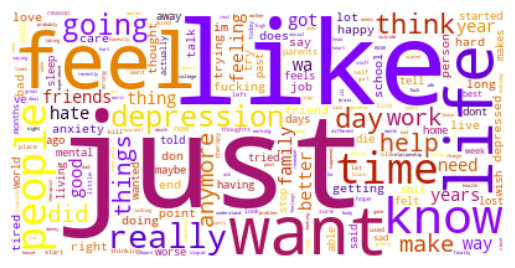

In [145]:
wordcloud_d = WordCloud(background_color = "white", colormap = "gnuplot")
wordcloud_d.generate_from_frequencies(dict(words_freq_d))
plt.figure()
plt.imshow(wordcloud_d, interpolation = "bilinear")
plt.axis("off")
plt.show()                

### Anxiety

In [146]:
anxiety = data[data['status'] == 'anxiety']

vectorizer_a = CountVectorizer(stop_words = "english")

X_anxiety = vectorizer_a.fit_transform(anxiety["statement"])

sum_words = X_anxiety.sum(axis = 0)


words_freq_a = [(word, sum_words[0, idx]) for word, idx in vectorizer_a.vocabulary_.items()]
words_freq_a = sorted(words_freq_a, key=lambda x: x[1], reverse=True)

top_20_words_a = words_freq_a[:20]


for word, freq in top_20_words_a:
    print(f"{word}: {freq}")

im: 5709
anxiety: 3472
just: 3127
like: 3008
ive: 2554
feel: 2122
dont: 1904
know: 1722
time: 1528
really: 1482
health: 1123
going: 1111
pain: 1094
heart: 1090
symptoms: 1086
feeling: 1085
think: 1053
day: 994
got: 964
started: 922


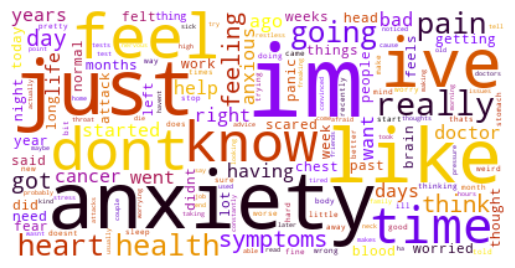

In [148]:
wordcloud_a = WordCloud(background_color = "white", colormap = "gnuplot")
wordcloud_a.generate_from_frequencies(dict(words_freq_a))
plt.figure()
plt.imshow(wordcloud_a, interpolation = "bilinear")
plt.axis("off")
plt.show()  

### Suicidial

In [149]:
suicidal = data[data['status'] == 'suicidal']

vectorizer_s = CountVectorizer(stop_words = "english")

X_suicidal = vectorizer_s.fit_transform(suicidal["statement"])

sum_words = X_suicidal.sum(axis = 0)


words_freq_s = [(word, sum_words[0, idx]) for word, idx in vectorizer_s.vocabulary_.items()]
words_freq_s = sorted(words_freq_s, key=lambda x: x[1], reverse=True)

top_20_words_s = words_freq_s[:20]


for word, freq in top_20_words_s:
    print(f"{word}: {freq}")

just: 14377
want: 10633
like: 9094
life: 7633
feel: 7517
know: 6534
people: 4688
anymore: 4399
going: 4267
time: 4156
think: 3875
really: 3850
die: 3448
did: 3204
fucking: 2877
help: 2872
years: 2800
friends: 2795
day: 2672
kill: 2606


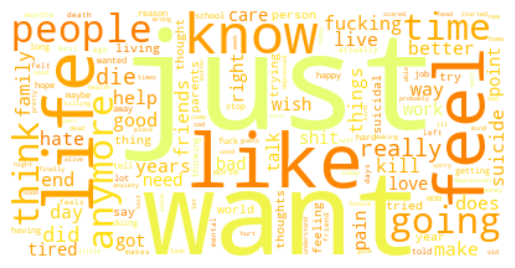

In [152]:
wordcloud_s = WordCloud(background_color = "white", colormap = "Wistia_r")
wordcloud_s.generate_from_frequencies(dict(words_freq_s))
plt.figure()
plt.imshow(wordcloud_s, interpolation = "bilinear")
plt.axis("off")
plt.show()  

### Stress

In [153]:
stress = data[data['status'] == 'stress']

vectorizer_st = CountVectorizer(stop_words = "english")

X_stress = vectorizer_st.fit_transform(stress["statement"])

sum_words = X_stress.sum(axis = 0)


words_freq_st = [(word, sum_words[0, idx]) for word, idx in vectorizer_st.vocabulary_.items()]
words_freq_st = sorted(words_freq_st, key=lambda x: x[1], reverse=True)

top_20_words_st = words_freq_st[:20]


for word, freq in top_20_words_st:
    print(f"{word}: {freq}")

im: 2439
just: 1523
like: 1491
dont: 1152
feel: 1149
stress: 1089
know: 908
ive: 874
time: 870
really: 679
work: 674
help: 590
want: 569
life: 556
anxiety: 537
going: 495
things: 489
day: 489
job: 441
people: 437


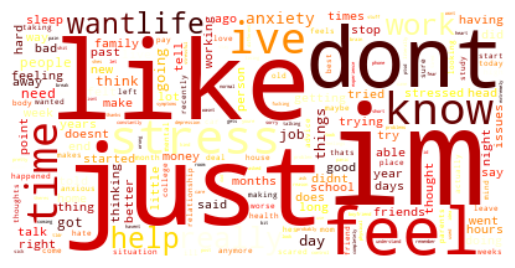

In [155]:
wordcloud_st = WordCloud(background_color = "white", colormap = "hot")
wordcloud_st.generate_from_frequencies(dict(words_freq_st))
plt.figure()
plt.imshow(wordcloud_st, interpolation = "bilinear")
plt.axis("off")
plt.show()  

### Bi-Polar

In [157]:
bipolar = data[data['status'] == 'bipolar']

vectorizer_b = CountVectorizer(stop_words = "english")

X_bipolar = vectorizer_b.fit_transform(bipolar["statement"])

sum_words = X_bipolar.sum(axis = 0)


words_freq_b = [(word, sum_words[0, idx]) for word, idx in vectorizer_b.vocabulary_.items()]
words_freq_b = sorted(words_freq_b, key=lambda x: x[1], reverse=True)

top_20_words_b = words_freq_b[:20]


for word, freq in top_20_words_b:
    print(f"{word}: {freq}")

im: 5141
just: 3079
like: 2726
feel: 2167
ive: 2032
dont: 2010
bipolar: 1686
know: 1619
really: 1367
time: 1362
want: 1190
life: 978
going: 929
people: 868
meds: 853
think: 836
years: 827
things: 803
work: 802
day: 764


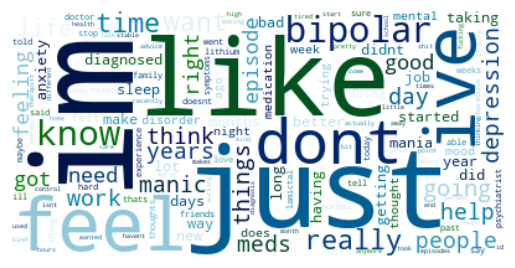

In [158]:
wordcloud_b = WordCloud(background_color = "white", colormap = "ocean")
wordcloud_b.generate_from_frequencies(dict(words_freq_b))
plt.figure()
plt.imshow(wordcloud_b, interpolation = "bilinear")
plt.axis("off")
plt.show()  

### Personality Disorder

In [159]:
personality = data[data['status'] == 'personality disorder']

vectorizer_p = CountVectorizer(stop_words = "english")

X_personality = vectorizer_p.fit_transform(personality["statement"])

sum_words = X_personality.sum(axis = 0)


words_freq_p = [(word, sum_words[0, idx]) for word, idx in vectorizer_p.vocabulary_.items()]
words_freq_p = sorted(words_freq_p, key=lambda x: x[1], reverse=True)

top_20_words_p = words_freq_p[:20]


for word, freq in top_20_words_p:
    print(f"{word}: {freq}")

im: 1653
like: 1384
just: 1213
dont: 1013
people: 1002
feel: 892
know: 675
ive: 528
want: 523
avpd: 491
life: 478
think: 477
really: 471
time: 438
friends: 339
things: 330
going: 271
years: 267
way: 266
make: 265


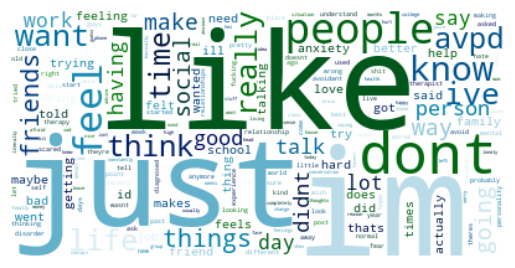

In [160]:
wordcloud_p = WordCloud(background_color = "white", colormap = "ocean")
wordcloud_p.generate_from_frequencies(dict(words_freq_p))
plt.figure()
plt.imshow(wordcloud_p, interpolation = "bilinear")
plt.axis("off")
plt.show()  

### Normal

In [161]:
normal = data[data['status'] == 'normal']

vectorizer_n = CountVectorizer(stop_words = "english")

X_normal = vectorizer_n.fit_transform(normal["statement"])

sum_words = X_normal.sum(axis = 0)


words_freq_n = [(word, sum_words[0, idx]) for word, idx in vectorizer_n.vocabulary_.items()]
words_freq_n = sorted(words_freq_n, key=lambda x: x[1], reverse=True)

top_20_words_n = words_freq_n[:20]


for word, freq in top_20_words_n:
    print(f"{word}: {freq}")

im: 1457
just: 1276
like: 1219
want: 1114
dont: 998
really: 854
time: 793
know: 727
good: 660
day: 614
people: 612
work: 581
going: 556
think: 502
got: 484
today: 450
make: 439
feel: 439
did: 426
need: 412


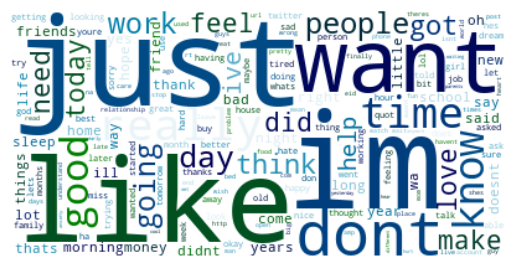

In [162]:
wordcloud_n = WordCloud(background_color = "white", colormap = "ocean")
wordcloud_n.generate_from_frequencies(dict(words_freq_n))
plt.figure()
plt.imshow(wordcloud_n, interpolation = "bilinear")
plt.axis("off")
plt.show()  

Stopwords and lemmatization??